## Importing packages

In [1]:
import pandas as pd
import matplotlib.patches as mpatches
from sklearn.linear_model import LinearRegression
import numpy as np
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px 
import seaborn as sns
import cufflinks as cf
import plotly as py
py.offline.init_notebook_mode(connected = True)
plt.rcParams.update({'font.size': 32})
cf.go_offline()
sns.set()

## Understanding the data

In [2]:
csv_solar = pd.read_csv('Excercise_Block6.csv')
solar_data =pd.DataFrame(csv_solar)
solar_data.head()

,TmStamp + TZ,Date,Time,GHI [W/m2],DfHI [W/m2],DNI [W/m2],Diff_Fraction,SolarZenith [°],SolarAzimuth [°],AirMass,...,DC_Imp_FT_T16_Total [A],DC_Imp_FT_T15_Total [A],DC_Vmp_HSAT_T8 [V],DC_Vmp_HSAT_T7 [V],DC_Vmp_FT_T16 [V],DC_Vmp_FT_T15 [V],AC_Pwr_FT [W],AC_Pwr_HSAT [W],HSAT_T7_angle [°],HSAT_T8_angle [°]
0,2020-01-01 09:00:00+01:00,2020-01-01,9:00:00 AM,8.497426,8.604454,0.230390,1.013774,87.894356,137.795556,19.317444,...,0.282000,0.275333,642.140000,637.081333,575.814000,616.280667,280.666667,298.666667,-6.053333,-5.733333
1,2020-01-01 09:15:00+01:00,2020-01-01,9:15:00 AM,16.138409,16.205092,0.233884,1.004440,86.597055,140.961111,14.135667,...,0.508667,0.500000,651.271333,656.026667,660.823333,671.042667,607.333333,634.000000,-11.560000,-11.486667
2,2020-01-01 09:30:00+01:00,2020-01-01,9:30:00 AM,27.361598,27.397492,0.293222,1.001511,85.359789,144.170000,11.135667,...,0.984000,0.978667,685.908667,683.979333,689.815333,687.564000,1278.666667,1210.666667,-17.800000,-17.613333
3,2020-01-01 09:45:00+01:00,2020-01-01,9:45:00 AM,38.943041,38.307201,5.373542,0.984250,84.200867,147.420000,9.246556,...,1.580000,1.519333,695.763333,701.963333,705.923333,703.146000,2112.666667,1968.000000,-25.546667,-25.153333
4,2020-01-01 10:00:00+01:00,2020-01-01,10:00:00 AM,34.551324,34.054532,3.698753,0.987464,83.134300,150.715556,7.979533,...,1.466667,1.374000,694.257333,695.728667,700.792667,700.566667,1926.666667,1710.000000,-35.740000,-35.206667


In [3]:
solar_data.shape

(8500, 27)

In [4]:
dropped_solar_data = solar_data.dropna()
dropped_solar_data

,TmStamp + TZ,Date,Time,GHI [W/m2],DfHI [W/m2],DNI [W/m2],Diff_Fraction,SolarZenith [°],SolarAzimuth [°],AirMass,...,DC_Imp_FT_T16_Total [A],DC_Imp_FT_T15_Total [A],DC_Vmp_HSAT_T8 [V],DC_Vmp_HSAT_T7 [V],DC_Vmp_FT_T16 [V],DC_Vmp_FT_T15 [V],AC_Pwr_FT [W],AC_Pwr_HSAT [W],HSAT_T7_angle [°],HSAT_T8_angle [°]
0,2020-01-01 09:00:00+01:00,2020-01-01,9:00:00 AM,8.497426,8.604454,0.230390,1.013774,87.894356,137.795556,19.317444,...,0.282000,0.275333,642.140000,637.081333,575.814000,616.280667,280.666667,298.666667,-6.053333,-5.733333
1,2020-01-01 09:15:00+01:00,2020-01-01,9:15:00 AM,16.138409,16.205092,0.233884,1.004440,86.597055,140.961111,14.135667,...,0.508667,0.500000,651.271333,656.026667,660.823333,671.042667,607.333333,634.000000,-11.560000,-11.486667
2,2020-01-01 09:30:00+01:00,2020-01-01,9:30:00 AM,27.361598,27.397492,0.293222,1.001511,85.359789,144.170000,11.135667,...,0.984000,0.978667,685.908667,683.979333,689.815333,687.564000,1278.666667,1210.666667,-17.800000,-17.613333
3,2020-01-01 09:45:00+01:00,2020-01-01,9:45:00 AM,38.943041,38.307201,5.373542,0.984250,84.200867,147.420000,9.246556,...,1.580000,1.519333,695.763333,701.963333,705.923333,703.146000,2112.666667,1968.000000,-25.546667,-25.153333
4,2020-01-01 10:00:00+01:00,2020-01-01,10:00:00 AM,34.551324,34.054532,3.698753,0.987464,83.134300,150.715556,7.979533,...,1.466667,1.374000,694.257333,695.728667,700.792667,700.566667,1926.666667,1710.000000,-35.740000,-35.206667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8495,2020-06-30 20:30:00+02:00,2020-06-30,8:30:00 PM,55.189860,55.051941,0.149706,0.997489,81.695778,299.486667,6.550989,...,2.084000,2.096667,673.675333,676.240000,682.560667,684.815333,2765.333333,2664.000000,25.140000,24.673333
8496,2020-06-30 20:45:00+02:00,2020-06-30,8:45:00 PM,48.050987,48.400133,0.074030,1.007468,83.482100,302.448889,8.144222,...,1.732000,1.748667,672.361333,675.058667,673.420667,673.707333,2254.000000,2560.000000,19.560000,19.380000
8497,2020-06-30 21:00:00+02:00,2020-06-30,9:00:00 PM,24.700204,24.799789,0.034919,1.003636,85.197911,305.416667,10.559889,...,0.998667,1.006667,658.706667,656.017333,658.740000,656.210000,1235.333333,1368.666667,14.400000,14.300000
8498,2020-06-30 21:15:00+02:00,2020-06-30,9:15:00 PM,22.853427,23.023368,0.067780,1.007135,86.825722,308.443333,14.486889,...,0.765333,0.762667,654.907333,651.618667,645.552667,650.240667,916.666667,995.333333,9.513333,9.366667


 ## Separating the timestamp column and grouping daily data

In [5]:
year = pd.DatetimeIndex(solar_data['Date']).year
month = pd.DatetimeIndex(solar_data['Date']).month
day = pd.DatetimeIndex(solar_data['Date']).day

In [6]:
solar_data['year'] = year
solar_data['month'] = month
solar_data['day'] = day
solar_data.head()

,TmStamp + TZ,Date,Time,GHI [W/m2],DfHI [W/m2],DNI [W/m2],Diff_Fraction,SolarZenith [°],SolarAzimuth [°],AirMass,...,DC_Vmp_HSAT_T7 [V],DC_Vmp_FT_T16 [V],DC_Vmp_FT_T15 [V],AC_Pwr_FT [W],AC_Pwr_HSAT [W],HSAT_T7_angle [°],HSAT_T8_angle [°],year,month,day
0,2020-01-01 09:00:00+01:00,2020-01-01,9:00:00 AM,8.497426,8.604454,0.230390,1.013774,87.894356,137.795556,19.317444,...,637.081333,575.814000,616.280667,280.666667,298.666667,-6.053333,-5.733333,2020,1,1
1,2020-01-01 09:15:00+01:00,2020-01-01,9:15:00 AM,16.138409,16.205092,0.233884,1.004440,86.597055,140.961111,14.135667,...,656.026667,660.823333,671.042667,607.333333,634.000000,-11.560000,-11.486667,2020,1,1
2,2020-01-01 09:30:00+01:00,2020-01-01,9:30:00 AM,27.361598,27.397492,0.293222,1.001511,85.359789,144.170000,11.135667,...,683.979333,689.815333,687.564000,1278.666667,1210.666667,-17.800000,-17.613333,2020,1,1
3,2020-01-01 09:45:00+01:00,2020-01-01,9:45:00 AM,38.943041,38.307201,5.373542,0.984250,84.200867,147.420000,9.246556,...,701.963333,705.923333,703.146000,2112.666667,1968.000000,-25.546667,-25.153333,2020,1,1
4,2020-01-01 10:00:00+01:00,2020-01-01,10:00:00 AM,34.551324,34.054532,3.698753,0.987464,83.134300,150.715556,7.979533,...,695.728667,700.792667,700.566667,1926.666667,1710.000000,-35.740000,-35.206667,2020,1,1


In [7]:
#pd.set_option('display.max_rows', 500)
groupby_days = pd.DataFrame(solar_data.groupby(['year','month','day']).size())
groupby_days

0
year month day    
2020 1     1    26
           2    26
           3    26
           4    26
           5    27
...             ..
     6     26   68
           27   68
           28   68
           29   68
           30   68

[174 rows x 1 columns]

## Counting NaN values

In [8]:
count_nan = len(solar_data['AC_Pwr_HSAT [W]']) - solar_data['AC_Pwr_HSAT [W]'].count()
count_nan

608

## After solving question 1

In [9]:
csv_solar_1 = pd.read_csv("GPOA_version.csv")
solar_data_1 =pd.DataFrame(csv_solar_1)

year = pd.DatetimeIndex(solar_data_1['Date']).year
month = pd.DatetimeIndex(solar_data_1['Date']).month
day = pd.DatetimeIndex(solar_data_1['Date']).day

solar_data_1['year'] = year
solar_data_1['month'] = month
solar_data_1['day'] = day


## AC performance ratio of HSAT

In [10]:
AC_performance_ratio_HSAT = pd.DataFrame(((solar_data_1['AC_Pwr_HSAT [W]']*1000)/(solar_data_1['GPOA_HSAT_Corrected']*53680)))
solar_data_1['AC_performance_ratio_HSAT'] = AC_performance_ratio_HSAT

In [11]:
solar_data_1['AC_performance_ratio_HSAT'].iplot(theme='solar',colors='RGB[230,210,0]')

In [12]:
cf.getThemes()

['ggplot', 'pearl', 'solar', 'space', 'white', 'polar', 'henanigans']

## Filtering AC performance ratio

In [13]:
filtered_AC_PR_NAN = pd.DataFrame(solar_data_1['AC_performance_ratio_HSAT'].dropna())
Performance_ratio_AC_HSAT = filtered_AC_PR_NAN[filtered_AC_PR_NAN > 0].dropna()
Performance_ratio_AC_HSAT_initial = Performance_ratio_AC_HSAT[Performance_ratio_AC_HSAT < 1.02].dropna()
solar_data_1['initial_AC_performance_HSAT'] = Performance_ratio_AC_HSAT_initial
final_AC_performance_ratio_HSAT = solar_data_1.groupby(['year', 'month', 'day'])['initial_AC_performance_HSAT'].mean()
final_AC_performance_ratio_HSAT

year  month  day
2020  1      1      0.917928
             2      0.882741
             3      0.868076
             4      0.805146
             5      0.952449
                      ...   
      6      26     0.881048
             27     0.896577
             28     0.961566
             29     0.895091
             30     0.924078
Name: initial_AC_performance_HSAT, Length: 174, dtype: float64

In [14]:
bitch_2 = final_AC_performance_ratio_HSAT.dropna().iplot(theme = 'pearl',kind = 'hist', fontcolor = 'Red', 
                                                         xTitle = 'Performance ratio',
                                                         yTitle = 'Counts', 
                                                         title = 'AC performance ratio of HSAT', 
                                                         linecolor = 'Black',
                                                         bargap = 0.1, 
                                                          histnorm = '', 
                                                         orientation = 'v', color='red', width=3)

## AC performance ratio of FT

In [15]:
AC_performance_ratio_FT = pd.DataFrame(((solar_data_1['AC_Pwr_FT [W]']*1000)/(solar_data_1['G-POA- FT-25']*53680)))
solar_data_1['AC_performance_ratio_FT'] = AC_performance_ratio_FT
solar_data_1['AC_performance_ratio_FT'].iplot(theme='solar')

In [16]:
filtered_AC_PR_FT = pd.DataFrame(solar_data_1['AC_performance_ratio_FT'].dropna())
Performance_ratio_AC_FT = filtered_AC_PR_FT[filtered_AC_PR_FT > 0].dropna()
Performance_ratio_AC_FT_initial = Performance_ratio_AC_FT[Performance_ratio_AC_FT < 1.03].dropna()
solar_data_1['initial_AC_performance_FT'] = Performance_ratio_AC_FT_initial
final_AC_performance_ratio_FT = solar_data_1.groupby(['year', 'month', 'day'])['initial_AC_performance_FT'].mean()
#final_dataframe['AC_PR_FT'] = pd.DataFrame(final_AC_performance_ratio_FT)
final_AC_performance_ratio_FT.dropna().iplot(theme = 'pearl',kind = 'hist', fontcolor = 'Red', 
                                                         xTitle = 'Performance ratio',
                                                         yTitle = 'Counts', 
                                                         title = 'AC performance ratio of FT', 
                                                         linecolor = 'Black',
                                                         bargap = 0.1, 
                                                          histnorm = '', 
                                                         orientation = 'v', color='red', width=3)


In [17]:
solar_data_1

,TmStamp + TZ,Date,Time,GHI [W/m2],DfHI [W/m2],DNI [W/m2],Diff_Fraction,SolarZenith [°],SolarAzimuth [°],AirMass,...,GPOA-HSAT-AV,SunHrs-HSAT,GPOA_HSAT_Corrected,year,month,day,AC_performance_ratio_HSAT,initial_AC_performance_HSAT,AC_performance_ratio_FT,initial_AC_performance_FT
0,2020-01-01 09:00:00+01:00,1/1/2020,0.375000,8.497426,8.604454,0.230390,1.013774,87.894356,137.795556,19.317444,...,7.200000,0.001800,7.200000,2020,1,1,0.772755,0.772755,0.792199,0.792199
1,2020-01-01 09:15:00+01:00,1/1/2020,0.385417,16.138409,16.205092,0.233884,1.004440,86.597055,140.961111,14.135667,...,14.266667,0.003567,14.266667,2020,1,1,0.827855,0.827855,0.861469,0.861469
2,2020-01-01 09:30:00+01:00,1/1/2020,0.395833,27.361598,27.397492,0.293222,1.001511,85.359789,144.170000,11.135667,...,25.266667,0.006317,25.266667,2020,1,1,0.892615,0.892615,0.955354,0.955354
3,2020-01-01 09:45:00+01:00,1/1/2020,0.406250,38.943041,38.307201,5.373542,0.984250,84.200867,147.420000,9.246556,...,39.866667,0.009967,39.866667,2020,1,1,0.919608,0.919608,1.039349,NaN
4,2020-01-01 10:00:00+01:00,1/1/2020,0.416667,34.551324,34.054532,3.698753,0.987464,83.134300,150.715556,7.979533,...,35.266667,0.008817,35.266667,2020,1,1,0.903273,0.903273,1.037332,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8495,2020-06-30 20:30:00+02:00,6/30/2020,0.854167,55.189860,55.051941,0.149706,0.997489,81.695778,299.486667,6.550989,...,52.533333,0.013133,52.533333,2020,6,30,0.944684,0.944684,0.946970,0.946970
8496,2020-06-30 20:45:00+02:00,6/30/2020,0.864583,48.050987,48.400133,0.074030,1.007468,83.482100,302.448889,8.144222,...,50.666667,0.012667,50.666667,2020,6,30,0.941250,0.941250,0.933102,0.933102
8497,2020-06-30 21:00:00+02:00,6/30/2020,0.875000,24.700204,24.799789,0.034919,1.003636,85.197911,305.416667,10.559889,...,27.800000,0.006950,27.800000,2020,6,30,0.917150,0.917150,0.906020,0.906020
8498,2020-06-30 21:15:00+02:00,6/30/2020,0.885417,22.853427,23.023368,0.067780,1.007135,86.825722,308.443333,14.486889,...,20.266667,0.005067,20.266667,2020,6,30,0.914900,0.914900,0.911557,0.911557


In [18]:
shadab = solar_data_1.groupby(['year', 'month', 'day']).mean()
shadab

Time  GHI [W/m2]  DfHI [W/m2]  DNI [W/m2]  Diff_Fraction  \
year month day                                                                 
2020 1     1    0.505208   59.237211    57.874825    7.293704       0.987795   
           2    0.505208   38.241276    38.071273    0.676866       0.999226   
           3    0.505208   17.578826    17.731053    0.220941       1.010841   
           4    0.505208   90.461489    43.337020  271.566527       0.653723   
           5    0.510417   61.443727    58.358595   18.926496       0.969599   
...                  ...         ...          ...         ...            ...   
     6     26   0.546875  465.789799   106.685737  582.354234       0.366080   
           27   0.546875  458.428215   132.322037  485.529911       0.485490   
           28   0.546875  213.873397   187.372490   49.920597       0.934740   
           29   0.546875  451.204804   122.738733  531.703457       0.465865   
           30   0.546875  251.955172   196.992567   95.276487       0.903329   

                SolarZenith [°]  SolarAzimuth [°]   AirMass  Wspd [m/s]  \
year month day                                                            
2020 1     1          82.079263        180.004786  8.267156    3.650000   
           2          82.000514        179.899487  8.116425    2.946154   
           3          81.915578        179.794701  7.911686    3.142308   
           4          81.821318        179.691667  7.826824    2.919231   
           5          81.977870        181.276091  8.473434    2.277778   
...                         ...               ...       ...         ...   
     6     26         57.409763        180.087621  3.544692    2.366176   
           27         57.445741        180.032943  3.534199    2.283824   
           28         57.487080        179.979363  3.550627    1.158824   
           29         57.534250        179.925997  3.568707    2.332353   
           30         57.587663        179.873639  3.565926    2.988235   

                HSAT_Gpoa [W/m2]  ...  (1-COS)8  (1+cos)8  Gamma-HSAT8  \
year month day                    ...                                    
2020 1     1           57.202564  ...  0.115756  0.884244   173.076923   
           2           33.953846  ...  0.116348  0.883652   173.076923   
           3           14.141026  ...  0.116928  0.883072   173.076923   
           4          126.297436  ...  0.117443  0.882557   173.076923   
           5           60.306173  ...  0.113506  0.886494   176.666667   
...                          ...  ...       ...       ...          ...   
     6     26         659.474510  ...  0.123242  0.876758   180.000000   
           27         596.466667  ...  0.123383  0.876617   180.000000   
           28         227.551961  ...  0.123129  0.876871   180.000000   
           29         624.316667  ...  0.121083  0.878917   180.000000   
           30         288.308824  ...  0.122795  0.877205   180.000000   

                GPOA-HSAT-AV  SunHrs-HSAT  GPOA_HSAT_Corrected  \
year month day                                                   
2020 1     1       57.202564     0.014301            57.202564   
           2       33.953846     0.008488            33.953846   
           3       14.141026     0.003535            14.141026   
           4      126.297436     0.031575           126.300000   
           5       60.306173     0.015077            60.306173   
...                      ...          ...                  ...   
     6     26     659.474510     0.164869           659.474510   
           27     596.466667     0.149117           596.466667   
           28     227.551961     0.056888           227.551961   
           29     624.316667     0.156079           624.316667   
           30     288.308824     0.072077           288.308824   

                AC_performance_ratio_HSAT  initial_AC_performance_HSAT  \
year month day                                                           
2020 1     1                     

In [19]:
#final_dataframe

## DC performance for HSAT

In [20]:
DC_power_T7 = pd.DataFrame(solar_data_1['DC_Imp_HSAT_T7_Total [A]'] * solar_data_1['DC_Vmp_HSAT_T7 [V]'])
solar_data_1['DC_power_T7'] = DC_power_T7

DC_power_T8 = pd.DataFrame(solar_data_1['DC_Imp_HSAT_T8_Total [A]'] * solar_data_1['DC_Vmp_HSAT_T8 [V]'])
solar_data_1['DC_power_T8'] = DC_power_T8 

DC_power_T15 = pd.DataFrame(solar_data_1['DC_Imp_FT_T15_Total [A]'] * solar_data_1['DC_Vmp_FT_T15 [V]'])
solar_data_1['DC_power_T15'] = DC_power_T15

DC_power_T16 = pd.DataFrame(solar_data_1['DC_Imp_FT_T16_Total [A]'] * solar_data_1['DC_Vmp_FT_T16 [V]'])
solar_data_1['DC_power_T16'] = DC_power_T16
solar_data_1

,TmStamp + TZ,Date,Time,GHI [W/m2],DfHI [W/m2],DNI [W/m2],Diff_Fraction,SolarZenith [°],SolarAzimuth [°],AirMass,...,month,day,AC_performance_ratio_HSAT,initial_AC_performance_HSAT,AC_performance_ratio_FT,initial_AC_performance_FT,DC_power_T7,DC_power_T8,DC_power_T15,DC_power_T16
0,2020-01-01 09:00:00+01:00,1/1/2020,0.375000,8.497426,8.604454,0.230390,1.013774,87.894356,137.795556,19.317444,...,1,1,0.772755,0.772755,0.792199,0.792199,163.942263,166.956400,169.682610,162.379548
1,2020-01-01 09:15:00+01:00,1/1/2020,0.385417,16.138409,16.205092,0.233884,1.004440,86.597055,140.961111,14.135667,...,1,1,0.827855,0.827855,0.861469,0.861469,335.885653,335.187646,335.521333,336.138802
2,2020-01-01 09:30:00+01:00,1/1/2020,0.395833,27.361598,27.397492,0.293222,1.001511,85.359789,144.170000,11.135667,...,1,1,0.892615,0.892615,0.955354,0.955354,628.805000,622.805069,672.895968,678.778288
3,2020-01-01 09:45:00+01:00,1/1/2020,0.406250,38.943041,38.307201,5.373542,0.984250,84.200867,147.420000,9.246556,...,1,1,0.919608,0.919608,1.039349,NaN,1013.167077,997.260777,1068.313156,1115.358867
4,2020-01-01 10:00:00+01:00,1/1/2020,0.416667,34.551324,34.054532,3.698753,0.987464,83.134300,150.715556,7.979533,...,1,1,0.903273,0.903273,1.037332,NaN,879.401035,874.764240,962.578600,1027.829245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8495,2020-06-30 20:30:00+02:00,6/30/2020,0.854167,55.189860,55.051941,0.149706,0.997489,81.695778,299.486667,6.550989,...,6,30,0.944684,0.944684,0.946970,0.946970,1384.037867,1345.105082,1435.829482,1422.456429
8496,2020-06-30 20:45:00+02:00,6/30/2020,0.864583,48.050987,48.400133,0.074030,1.007468,83.482100,302.448889,8.144222,...,6,30,0.941250,0.941250,0.933102,0.933102,1330.765651,1289.589037,1178.089557,1166.364595
8497,2020-06-30 21:00:00+02:00,6/30/2020,0.875000,24.700204,24.799789,0.034919,1.003636,85.197911,305.416667,10.559889,...,6,30,0.917150,0.917150,0.906020,0.906020,717.682963,694.276827,660.584734,657.861680
8498,2020-06-30 21:15:00+02:00,6/30/2020,0.885417,22.853427,23.023368,0.067780,1.007135,86.825722,308.443333,14.486889,...,6,30,0.914900,0.914900,0.911557,0.911557,525.204645,509.517905,495.916882,494.062974


In [21]:
DC_power_HSAT = pd.DataFrame(solar_data_1['DC_power_T7'] + solar_data_1['DC_power_T8'])
solar_data_1['DC_power_HSAT'] = DC_power_HSAT
solar_data_1

,TmStamp + TZ,Date,Time,GHI [W/m2],DfHI [W/m2],DNI [W/m2],Diff_Fraction,SolarZenith [°],SolarAzimuth [°],AirMass,...,day,AC_performance_ratio_HSAT,initial_AC_performance_HSAT,AC_performance_ratio_FT,initial_AC_performance_FT,DC_power_T7,DC_power_T8,DC_power_T15,DC_power_T16,DC_power_HSAT
0,2020-01-01 09:00:00+01:00,1/1/2020,0.375000,8.497426,8.604454,0.230390,1.013774,87.894356,137.795556,19.317444,...,1,0.772755,0.772755,0.792199,0.792199,163.942263,166.956400,169.682610,162.379548,330.898663
1,2020-01-01 09:15:00+01:00,1/1/2020,0.385417,16.138409,16.205092,0.233884,1.004440,86.597055,140.961111,14.135667,...,1,0.827855,0.827855,0.861469,0.861469,335.885653,335.187646,335.521333,336.138802,671.073300
2,2020-01-01 09:30:00+01:00,1/1/2020,0.395833,27.361598,27.397492,0.293222,1.001511,85.359789,144.170000,11.135667,...,1,0.892615,0.892615,0.955354,0.955354,628.805000,622.805069,672.895968,678.778288,1251.610070
3,2020-01-01 09:45:00+01:00,1/1/2020,0.406250,38.943041,38.307201,5.373542,0.984250,84.200867,147.420000,9.246556,...,1,0.919608,0.919608,1.039349,NaN,1013.167077,997.260777,1068.313156,1115.358867,2010.427855
4,2020-01-01 10:00:00+01:00,1/1/2020,0.416667,34.551324,34.054532,3.698753,0.987464,83.134300,150.715556,7.979533,...,1,0.903273,0.903273,1.037332,NaN,879.401035,874.764240,962.578600,1027.829245,1754.165275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8495,2020-06-30 20:30:00+02:00,6/30/2020,0.854167,55.189860,55.051941,0.149706,0.997489,81.695778,299.486667,6.550989,...,30,0.944684,0.944684,0.946970,0.946970,1384.037867,1345.105082,1435.829482,1422.456429,2729.142949
8496,2020-06-30 20:45:00+02:00,6/30/2020,0.864583,48.050987,48.400133,0.074030,1.007468,83.482100,302.448889,8.144222,...,30,0.941250,0.941250,0.933102,0.933102,1330.765651,1289.589037,1178.089557,1166.364595,2620.354689
8497,2020-06-30 21:00:00+02:00,6/30/2020,0.875000,24.700204,24.799789,0.034919,1.003636,85.197911,305.416667,10.559889,...,30,0.917150,0.917150,0.906020,0.906020,717.682963,694.276827,660.584734,657.861680,1411.959789
8498,2020-06-30 21:15:00+02:00,6/30/2020,0.885417,22.853427,23.023368,0.067780,1.007135,86.825722,308.443333,14.486889,...,30,0.914900,0.914900,0.911557,0.911557,525.204645,509.517905,495.916882,494.062974,1034.722551


In [22]:
DC_performance_ratio_HSAT = pd.DataFrame(((solar_data_1['DC_power_HSAT']*1000)/(solar_data_1['GPOA_HSAT_Corrected']*53680)))
solar_data_1['DC_performance_ratio_HSAT'] = DC_performance_ratio_HSAT
filtered_DC_PR_NAN = pd.DataFrame(solar_data_1['DC_performance_ratio_HSAT'].dropna())
Performance_ratio_DC_HSAT = filtered_DC_PR_NAN[filtered_DC_PR_NAN > 0].dropna()
Performance_ratio_DC_HSAT_initial = Performance_ratio_DC_HSAT[Performance_ratio_DC_HSAT < 1.02].dropna()
solar_data_1['Performance_ratio_DC_HSAT_initial'] = Performance_ratio_DC_HSAT_initial
final_DC_performance_ratio_HSAT = pd.DataFrame(solar_data_1.groupby(['year', 'month', 'day'])['Performance_ratio_DC_HSAT_initial'].mean())
final_DC_performance_ratio_HSAT.dropna().iplot(theme = 'pearl',kind = 'hist', fontcolor = 'Red', 
                                                         xTitle = 'Performance ratio',
                                                         yTitle = 'Counts', 
                                                         title = 'DC performance ratio of HSAT', 
                                                         linecolor = 'Black',
                                                         bargap = 0.1, 
                                                          histnorm = '', 
                                                         orientation = 'v', color='red', width=3)

## DC performance of FT

In [23]:
DC_power_FT = pd.DataFrame(solar_data_1['DC_power_T15'] + solar_data_1['DC_power_T16'])
solar_data_1['DC_power_FT'] = DC_power_FT
solar_data_1

,TmStamp + TZ,Date,Time,GHI [W/m2],DfHI [W/m2],DNI [W/m2],Diff_Fraction,SolarZenith [°],SolarAzimuth [°],AirMass,...,AC_performance_ratio_FT,initial_AC_performance_FT,DC_power_T7,DC_power_T8,DC_power_T15,DC_power_T16,DC_power_HSAT,DC_performance_ratio_HSAT,Performance_ratio_DC_HSAT_initial,DC_power_FT
0,2020-01-01 09:00:00+01:00,1/1/2020,0.375000,8.497426,8.604454,0.230390,1.013774,87.894356,137.795556,19.317444,...,0.792199,0.792199,163.942263,166.956400,169.682610,162.379548,330.898663,0.856150,0.856150,332.062158
1,2020-01-01 09:15:00+01:00,1/1/2020,0.385417,16.138409,16.205092,0.233884,1.004440,86.597055,140.961111,14.135667,...,0.861469,0.861469,335.885653,335.187646,335.521333,336.138802,671.073300,0.876264,0.876264,671.660136
2,2020-01-01 09:30:00+01:00,1/1/2020,0.395833,27.361598,27.397492,0.293222,1.001511,85.359789,144.170000,11.135667,...,0.955354,0.955354,628.805000,622.805069,672.895968,678.778288,1251.610070,0.922802,0.922802,1351.674256
3,2020-01-01 09:45:00+01:00,1/1/2020,0.406250,38.943041,38.307201,5.373542,0.984250,84.200867,147.420000,9.246556,...,1.039349,NaN,1013.167077,997.260777,1068.313156,1115.358867,2010.427855,0.939434,0.939434,2183.672022
4,2020-01-01 10:00:00+01:00,1/1/2020,0.416667,34.551324,34.054532,3.698753,0.987464,83.134300,150.715556,7.979533,...,1.037332,NaN,879.401035,874.764240,962.578600,1027.829245,1754.165275,0.926603,0.926603,1990.407845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8495,2020-06-30 20:30:00+02:00,6/30/2020,0.854167,55.189860,55.051941,0.149706,0.997489,81.695778,299.486667,6.550989,...,0.946970,0.946970,1384.037867,1345.105082,1435.829482,1422.456429,2729.142949,0.967785,0.967785,2858.285912
8496,2020-06-30 20:45:00+02:00,6/30/2020,0.864583,48.050987,48.400133,0.074030,1.007468,83.482100,302.448889,8.144222,...,0.933102,0.933102,1330.765651,1289.589037,1178.089557,1166.364595,2620.354689,0.963441,0.963441,2344.454152
8497,2020-06-30 21:00:00+02:00,6/30/2020,0.875000,24.700204,24.799789,0.034919,1.003636,85.197911,305.416667,10.559889,...,0.906020,0.906020,717.682963,694.276827,660.584734,657.861680,1411.959789,0.946161,0.946161,1318.446414
8498,2020-06-30 21:15:00+02:00,6/30/2020,0.885417,22.853427,23.023368,0.067780,1.007135,86.825722,308.443333,14.486889,...,0.911557,0.911557,525.204645,509.517905,495.916882,494.062974,1034.722551,0.951106,0.951106,989.979856


In [24]:
DC_performance_ratio_FT = pd.DataFrame(((solar_data_1['DC_power_FT']*1000)/(solar_data_1['G-POA- FT-25']*53680)))
solar_data_1['DC_performance_ratio_FT'] = DC_performance_ratio_FT
filtered_DC_PR_FT = pd.DataFrame(solar_data_1['DC_performance_ratio_FT'].dropna())
Performance_ratio_DC_FT = filtered_DC_PR_FT[filtered_DC_PR_FT > 0].dropna()
Performance_ratio_DC_FT_initial = Performance_ratio_DC_FT[Performance_ratio_DC_FT < 1.02].dropna()
solar_data_1['Performance_ratio_DC_FT_initial'] = Performance_ratio_DC_FT_initial
final_DC_performance_ratio_FT = pd.DataFrame(solar_data_1.groupby(['year', 'month', 'day'])['Performance_ratio_DC_FT_initial'].mean())
final_DC_performance_ratio_FT.dropna().iplot(theme = 'pearl',kind = 'hist', fontcolor = 'Red', 
                                                         xTitle = 'Performance ratio',
                                                         yTitle = 'Counts', 
                                                         title = 'DC performance ratio of FT', 
                                                         linecolor = 'Black',
                                                         bargap = 0.1, 
                                                          histnorm = '', 
                                                         orientation = 'v', color='red', width=3)


In [25]:
filtered_AC_PR_FT.iplot()

In [26]:
plots = pd.read_csv('plots.csv')
plots.head()

,Month,Sum of Sun Hrs FT,Sum of Sun Hrs HSAT,Unnamed: 3,Months.Eff.F,Average of Eff_DC,Average of Eff_AC,Unnamed: 7,Months.Eff.HSAT,Average of Eff_DC.1,Average of Eff_AC.1
0,Jan,13.228700,10.302433,NaN,Jan,0.187101,0.175405,NaN,Jan,0.178708,0.171633
1,Feb,35.155660,28.994097,NaN,Feb,0.162837,0.157985,NaN,Feb,0.165176,0.162043
2,Mar,114.644835,114.577231,NaN,Mar,0.156378,0.153069,NaN,Mar,0.157851,0.155466
3,Apr,173.729317,201.435517,NaN,Apr,0.181026,0.177350,NaN,Apr,0.183500,0.180443
4,May,187.038391,230.929331,NaN,May,0.173034,0.168634,NaN,May,0.180442,0.176935


## Sun hours plot

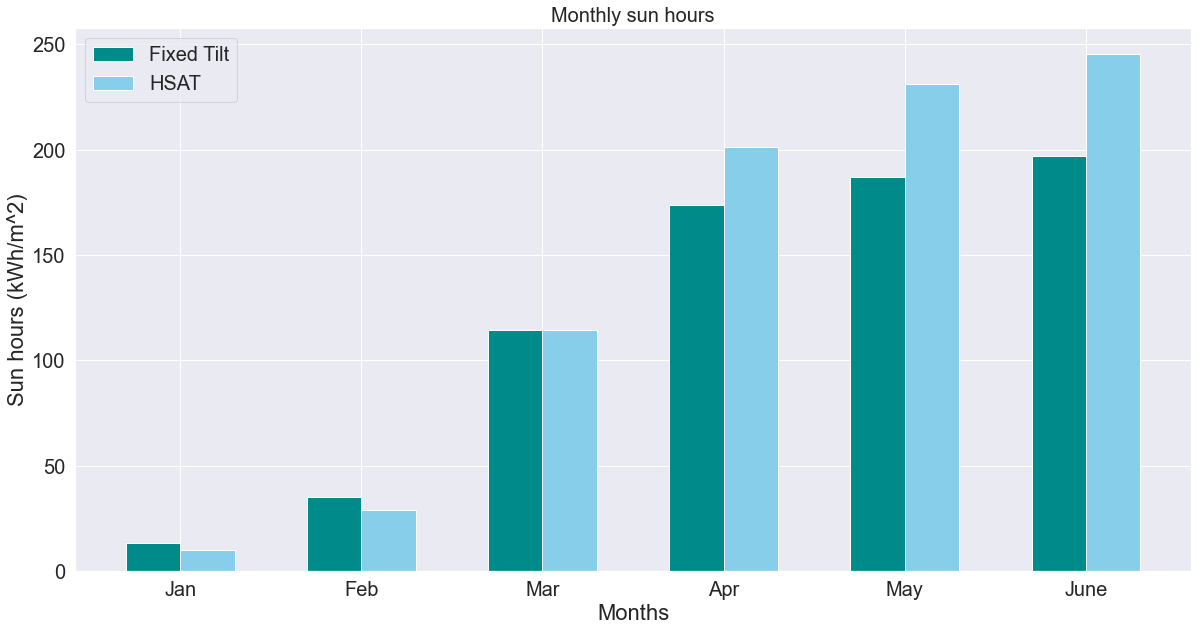

In [27]:
fig, ax = plt.subplots( figsize=(20,10))
plt.title('Monthly sun hours',fontsize=20)
plt.ylabel('Sun hours (kWh/m^2)',fontsize=22)
plt.xlabel ('Months',fontsize=22)
bar_width = 0.3
months = plots['Month']
Fixed_tilt = plots['Sum of Sun Hrs FT']
HSAT_sun_hours = plots['Sum of Sun Hrs HSAT']
x=np.arange(len(months))

plt.yticks(fontsize=20)
plt.xticks(x+0.15,['Jan','Feb','Mar','Apr','May','June'],fontsize=20)
plt.bar(x, Fixed_tilt, width=bar_width, zorder = 2,color = 'darkcyan',label = 'Fixed Tilt')
plt.bar(x + bar_width,  HSAT_sun_hours ,width=bar_width, zorder = 2,color = 'skyblue', label = 'HSAT')

plt.legend(fontsize=20)



## Efficiency plot

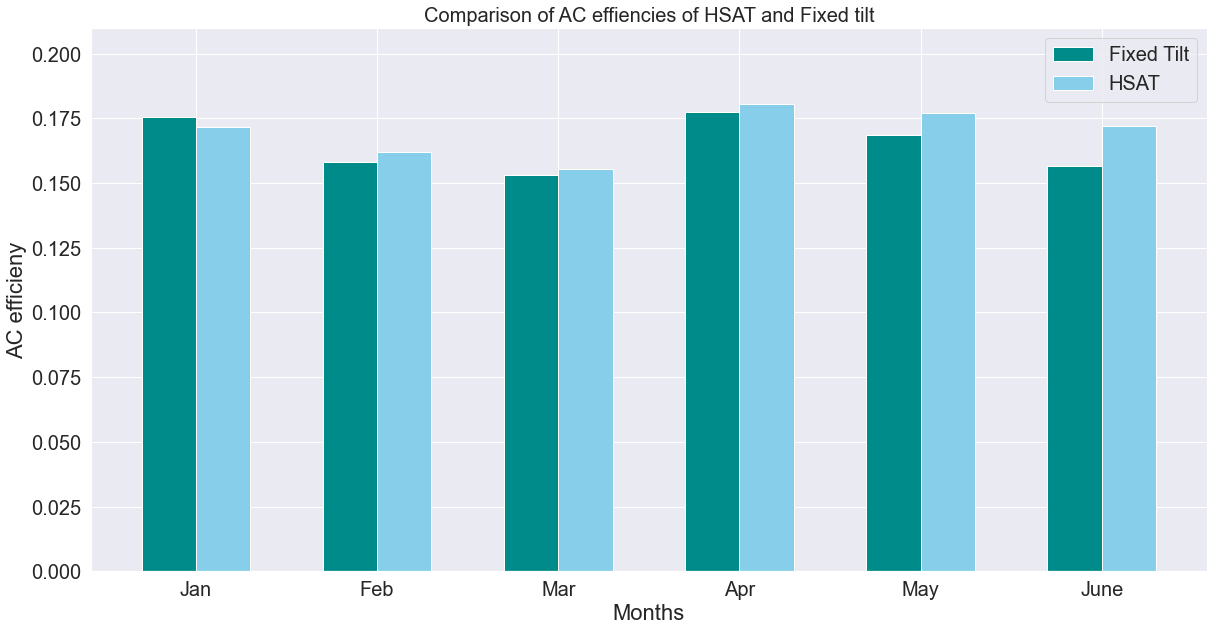

In [28]:
fig, ax = plt.subplots( figsize=(20,10))
plt.title('Comparison of AC effiencies of HSAT and Fixed tilt',fontsize=20)
plt.ylabel('AC efficieny',fontsize=22)
plt.xlabel ('Months',fontsize=22)
bar_width = 0.3
months = plots['Month']
Fixed_tilt = plots['Average of Eff_AC']
HSAT_sun_hours = plots['Average of Eff_AC.1']
x=np.arange(len(months))

plt.ylim([0, 0.21])
plt.yticks(fontsize=20)
plt.xticks(x+0.15,['Jan','Feb','Mar','Apr','May','June'],fontsize=20)
plt.bar(x, Fixed_tilt, width=bar_width, zorder = 2,color = 'darkcyan',label = 'Fixed Tilt')
plt.bar(x + bar_width,  HSAT_sun_hours ,width=bar_width, zorder = 2,color = 'skyblue', label = 'HSAT')

plt.legend(fontsize=20)


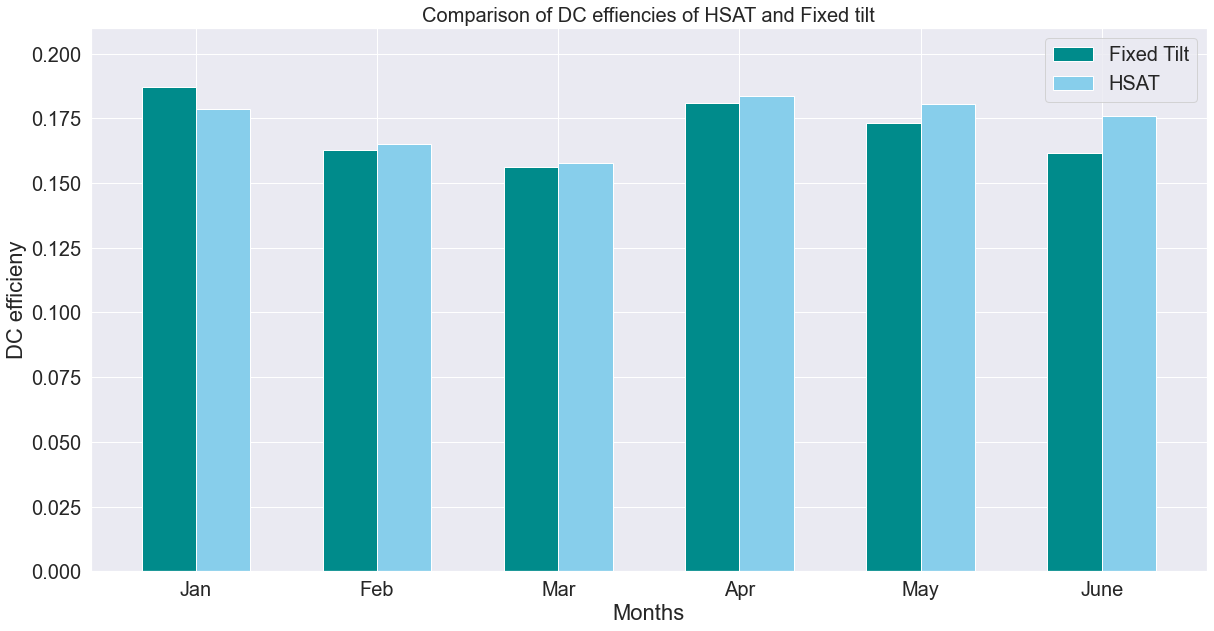

In [29]:
fig, ax = plt.subplots( figsize=(20,10))
plt.title('Comparison of DC effiencies of HSAT and Fixed tilt',fontsize=20)
plt.ylabel('DC efficieny',fontsize=22)
plt.xlabel ('Months',fontsize=22)
bar_width = 0.3
months = plots['Month']
Fixed_tilt = plots['Average of Eff_DC']
HSAT_sun_hours = plots['Average of Eff_DC.1']
x=np.arange(len(months))

plt.ylim([0, 0.21])
plt.yticks(fontsize=20)
plt.xticks(x+0.15,['Jan','Feb','Mar','Apr','May','June'],fontsize=20)
plt.bar(x, Fixed_tilt, width=bar_width, zorder = 2,color = 'darkcyan',label = 'Fixed Tilt')
plt.bar(x + bar_width,  HSAT_sun_hours ,width=bar_width, zorder = 2,color = 'skyblue', label = 'HSAT')

plt.legend(fontsize=20)


In [30]:
new_PR_c = pd.read_csv('PR_corrected.csv')
new_PR_c.shape

(174, 12)

In [31]:
new_df = new_PR_c[new_PR_c['PR_corrected_FT'].between(0.5,1)]
new_df['PR_corrected_FT'].iplot(theme = 'pearl',kind = 'hist', fontcolor = 'Red', 
                                                         xTitle = 'Performance ratio',
                                                         yTitle = 'Counts', 
                                                         title = 'AC corrected performance ratio of FT', 
                                                         linecolor = 'Black',
                                                         bargap = 0.1, 
                                                         histnorm = '', 
                                                         orientation = 'v', color='skyblue', width=3)






In [32]:
new_df = new_PR_c[new_PR_c['PR_corrected_HSAT'].between(0.5,1)]
new_df['PR_corrected_HSAT'].iplot(theme = 'pearl',kind = 'hist', fontcolor = 'Red', 
                                                         xTitle = 'Performance ratio',
                                                         yTitle = 'Counts', 
                                                         title = 'AC corrected performance ratio of HSAT', 
                                                         linecolor = 'Black',
                                                         bargap = 0.1, 
                                                         histnorm = '', 
                                                         orientation = 'v', color='skyblue', width=3, fontsize = 20)

In [33]:
import plotly.graph_objects as go

x0 = final_AC_performance_ratio_FT.dropna()
x1 = new_df['PR_corrected_FT']

fig = go.Figure()
fig.add_trace(go.Histogram(
    x=x0,
    histnorm='',
    name='AC performance ratio of FT', # name used in legend and hover labels
    xbins=dict( # bins used for histogram
        start=0,
        end=1,
        size=0.03
    ),
    marker_color='skyblue',
    opacity=0.70
))
fig.add_trace(go.Histogram(
    x=x1,
    histnorm='',
    name='AC corrected performance ratio of FT',
    xbins=dict(
        start=0,
        end=1,
        size=0.03
    ),
    marker_color='red',
    opacity=0.70
))

fig.update_layout(
    title_text='AC performance ratio of fixed tilt system', # title of plot
    xaxis_title_text='Performance ratio', # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0.1 # gap between bars of the same location coordinates
)

fig.show()

In [35]:
import plotly.graph_objects as go

x0 = final_AC_performance_ratio_HSAT.dropna()
x1 = new_df['PR_corrected_HSAT']

fig = go.Figure()
fig.add_trace(go.Histogram(
    x=x0,
    histnorm='',
    name='AC performance ratio of HSAT', # name used in legend and hover labels
    xbins=dict( # bins used for histogram
        start=0,
        end=1,
        size=0.03
    ),
    marker_color='skyblue',
    opacity=0.70
))
fig.add_trace(go.Histogram(
    x=x1,
    histnorm='',
    name='AC corrected performance ratio of HSAT',
    xbins=dict(
        start=0,
        end=1,
        size=0.03
    ),
    marker_color='darkcyan',
    opacity=0.70
))

fig.update_layout(
    title_text='AC performance ratio of single axis tracking system', # title of plot
    xaxis_title_text='Performance ratio', # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0.1 # gap between bars of the same location coordinates
)

fig.show()

In [44]:
final_AC_performance_ratio_FT.dropna().mean()

0.9167523936594751

In [42]:
new_df['PR_corrected_FT'].mean()

0.9012540372670814